<img src="./images/shouke_logo.png"
     style="float: right"
     width=100
     style="padding-bottom:100px;"/>
<br>
<br>

<table style="float:center;">
    <tr>
        <td>
            <img src='./images/python-logo.png'width=130>
        </td>
        <td>
            <img src='./images/pandas-logo.png'width=150>
        </td>
    </tr>
</table>

<h1 style='text-align: center;'>Detecting Outliers of DataFrame</h1>
<h3 style='text-align: center;'>Shouke Wei, Ph.D. Professor</h3>
<h4 style='text-align: center;'>Email: shouke.wei@gmail.com</h4>

## Objective
- learn to dectect outliers in dataframe with some handy methods

In [1]:
# import required packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv('./data/gdp_china_mis_cl.csv')

# display the column names
df.columns

Index(['prov', 'gdpr', 'year', 'gdp', 'pop', 'finv', 'trade', 'fexpen',
       'uinc'],
      dtype='object')

## 1. What are Outliers?

An Outlier is a data point which is very far or significantly different from all other data points.

### Natural and non-natural outliers

- The non-natural outliers are those which are caused by measurement errors, wrong data collection, or wrong data entry; 
- whereas natural outliers could be the use case of fraudulent transactions in banking data, etc.   

## 2. Generally judge if there is outlier

In [2]:
df.describe()

,year,gdp,pop,finv,trade,fexpen,uinc
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,2009.000000,3.456443,8.320427,1.914406,2.122045,0.448604,2.204282
std,5.506283,2.365092,1.786978,1.558411,2.300531,0.366626,1.225310
min,2000.000000,0.505299,4.680000,0.137774,0.000523,0.043130,0.476626
25%,2004.000000,1.425301,7.560138,0.588736,0.412089,0.138071,1.159632
50%,2009.000000,3.093328,9.180000,1.418528,1.523541,0.326767,1.994583
75%,2014.000000,4.956176,9.487500,3.056260,3.054562,0.700097,3.059870
max,2018.000000,9.727777,10.999000,5.521350,14.609701,1.572926,5.557430


## 3. Detecting outliers using plots
### 3.1 Boxplot
<img src='./images/iqr_img.png' width=450>
<p style="text-align:center;">Source: Understanding Boxplots by Michael Galarnyk (2018)</p>


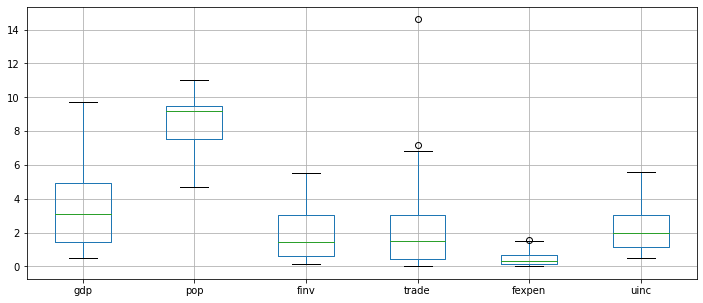

In [4]:
boxplot = df.boxplot(figsize=(12,5),column=['gdp', 'pop', 'finv', 'trade', 'fexpen','uinc'])

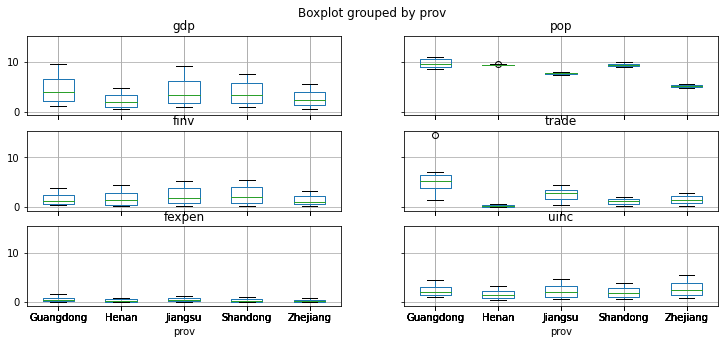

In [5]:
boxplot = df.boxplot(figsize=(12,5),column=['gdp', 'pop', 'finv', 'trade', 'fexpen','uinc'],by='prov')

### 3.2 Matrix scatter plot

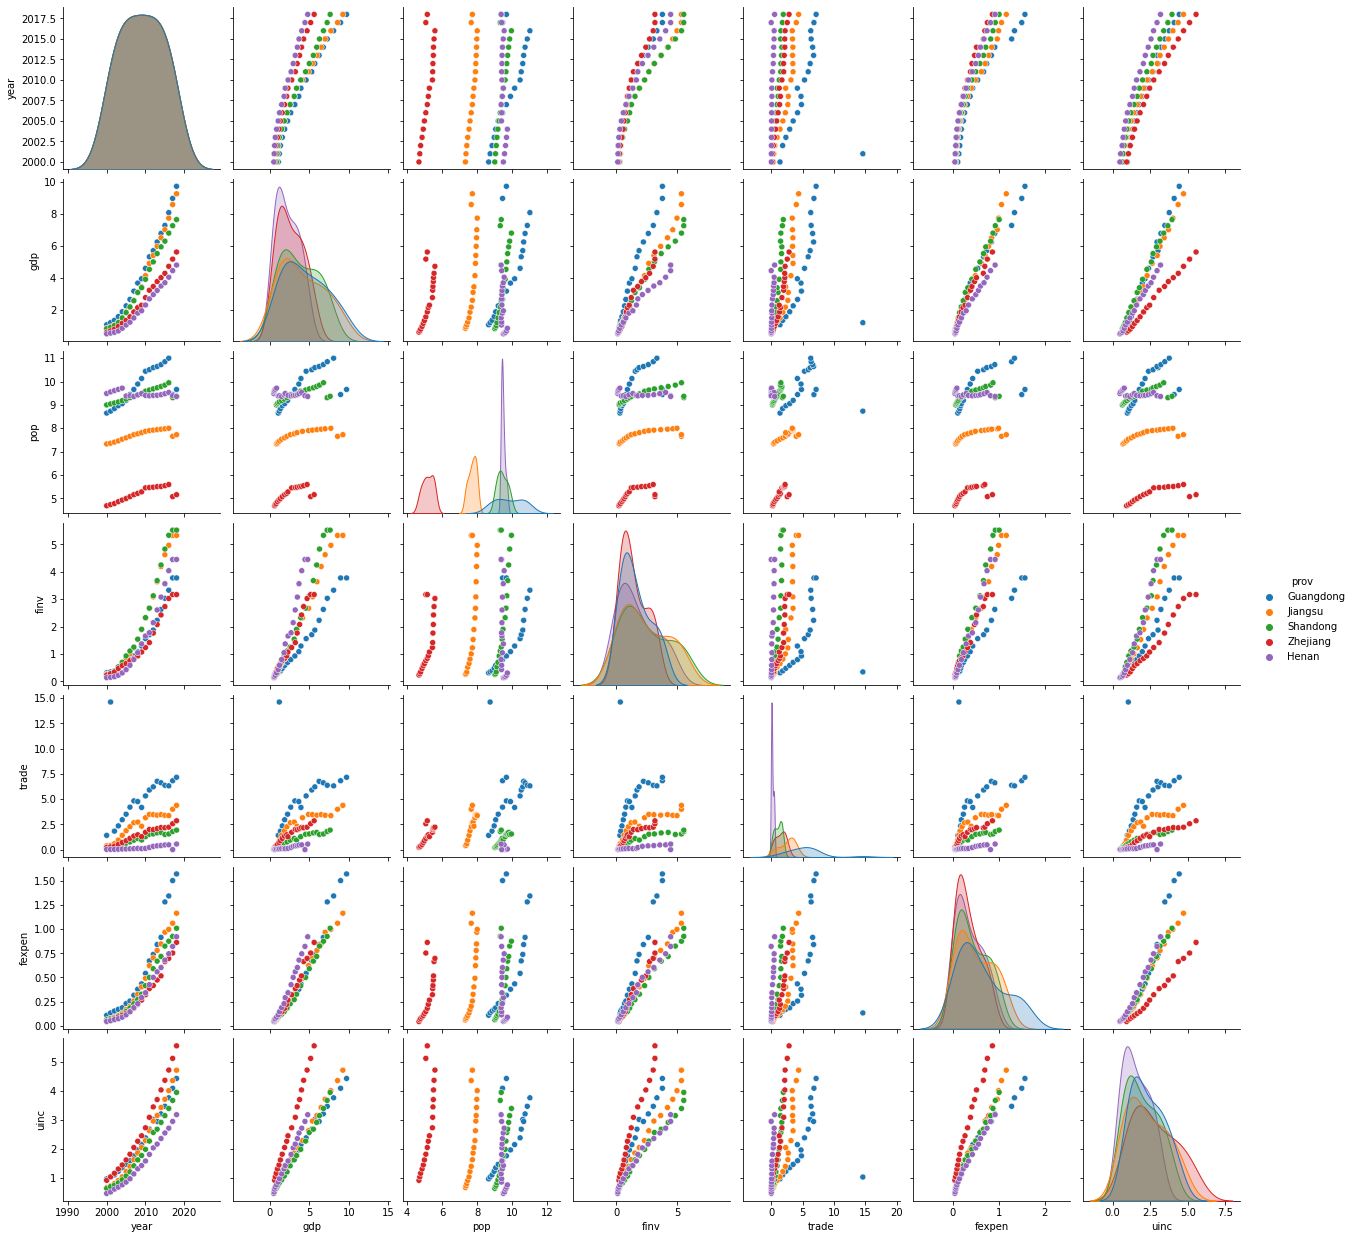

In [6]:
sns.pairplot(data=df,hue='prov')

In seaborn, the `hue` parameter denotes which column decides the kind of color. `hue="prov" tells seaborn you want to colour the data points for 5 provinces differently.

<AxesSubplot:xlabel='trade', ylabel='gdp'>

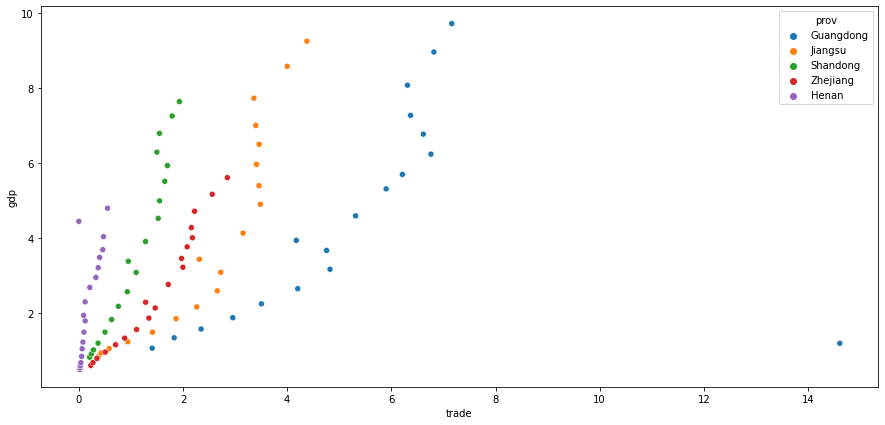

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='trade',y='gdp',data=df,hue='prov')

In [9]:
# show the outliers index number
df['trade'].idxmax(),df['trade'].idxmin()

(1, 93)

In [10]:
# display as dataframe
df.loc[[1,93]]

,prov,gdpr,year,gdp,pop,finv,trade,fexpen,uinc
1,Guangdong,First,2001,1.203925,8.733,0.348443,14.609701,0.132133,1.041519
93,Henan,Fifth,2017,4.455283,9.392,4.449690,0.000523,0.821552,2.955790


## 4. Detecting outliers using quantile ranges

In [11]:
min_threshold,max_threshold = df['trade'].quantile([0.01,0.99])
min_threshold,max_threshold

(0.017796237800000003, 7.607179460000017)

In [13]:
df[(df['trade']<min_threshold)|(df['trade']>max_threshold)]

,prov,gdpr,year,gdp,pop,finv,trade,fexpen,uinc
1,Guangdong,First,2001,1.203925,8.733,0.348443,14.609701,0.132133,1.041519
93,Henan,Fifth,2017,4.455283,9.392,4.449690,0.000523,0.821552,2.955790
